<center><h1>Artificial Intelligence Journals Ranking (2000 - 2021)</h1></center>

<center><h3>Vásquez, V., Cruz, J. & Henao, M.</h3></center>

<ul>
    <li><b>Rank:</b>  Consecutive number assigned to records by table </li>
    <li><b>Source ID:</b> Scopus Journal ID </li>
    <li><b>Title:</b> Journal’s title</li>
    <li><b>Type:</b> Type of publication (Journal, Book Series and Conference & Proceedings) </li>
    <li><b>ISSN:</b> International Standard Serial Number  </li>
    <li><b>SJR:</b> Weighted citations received in year X to documents published in the journal in years X-1, X-2 and X-3.</li>
    <li><b>SJR Quartile:</b> Each thematic category is divided into quartiles. </li>
</ul>   
<ul>
<li><b>Q1:</b> group made up of the first 25% of the journals on the list. </li>
<li><b>Q2:</b> group that occupies from 25 to 50% </li>
<li><b>Q3:</b> group that is positioned between 50 and 75% </li>
<li><b>Q4:</b> group that is positioned between 75 and 100% </li>
    
</ul>
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    blished in thrs</li>b> Number of citable documents published by a journal in the three previous years</li>

<li><b>Cites / Doc. (2years):</b> Margin between citable documents and thrnal in the two previous years </li>

<li><b>Ref. / Doc:</b> Margin between all the bibliographical references in a journal in the selected period and the total documents published </li>
</ul>

In [ ]:
# System variables
import os 
from glob import glob

# Data processing libraries
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport

# Dataset connection
import opendatasets as od

# Graphic tools 
import seaborn as sns/9
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
# Download dataset
od.download("https://www.kaggle.com/datasets/yasirabdaali/artificial-intelligence-journals-ranking-20002021")

Skipping, found downloaded files in "./artificial-intelligence-journals-ranking-20002021" (use force=True to force download)


In [3]:
def path_csvFiles (PATH = os.getcwd(),EXT = "*.csv"):  
    """
    Retrieve all files with a given extension (EXT = *.csv by default) from current
    working directory where the process is being implemented, using os.getcwd () 
    and the glob module, which finds all path names that resemble a specified pattern 
    according to the rules that are followed in a Unix terminal.
    
    Returns:6
        Returns a list with all the files path of the given extension 
    """
    list_paths = []
    for path, subdir, files in os.walk(PATH):
        for file in glob(os.path.join(path, EXT)):
            if file.find("scimagojr") != -1:
                list_paths.append(file)
    return list_paths


def concat_paths(all_paths):
    """receives a list of file directories with a CSV extension 
    and creates a dataset by concatenating each file
    and assigning each file a year label that is stored in the "Year" column,
    returning a dataframe

    Returns: 
        Returns a dataframe
    """

    all_df = []
    for path in all_paths:
        df = pd.read_csv(path, sep = ';')        
        df['Year'] = int(path.split()[1])
        all_df.append(df)
    
    df = pd.concat(all_df, ignore_index=True)
    return df 

In [4]:
# Se hace llamado a las funciones encargadas de leer y unir las tablas del dataset
df = concat_paths(path_csvFiles())
df.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Quartile,H index,Total Docs. (2008),Total Docs. (3years),...,Total Docs. (2021),Total Docs. (2000),Total Docs. (2019),Total Docs. (2004),Total Docs. (2020),Total Docs. (2003),Total Docs. (2012),Total Docs. (2007),Total Docs. (2006),Total Docs. (2002)
0,1,12872,Cognitive Psychology,journal,"10955623, 00100285","3,499",Q1,123,21.0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,23127,Journal of the ACM,journal,"00045411, 1557735X","3,301",Q1,131,28.0,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,24254,IEEE Transactions on Pattern Analysis and Mach...,journal,01628828,"2,979",Q1,377,186.0,562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,22478,Journal of Memory and Language,journal,"10960821, 0749596X","2,669",Q1,156,85.0,194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24242,IEEE Transactions on Fuzzy Systems,journal,10636706,"2,581",Q1,202,134.0,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

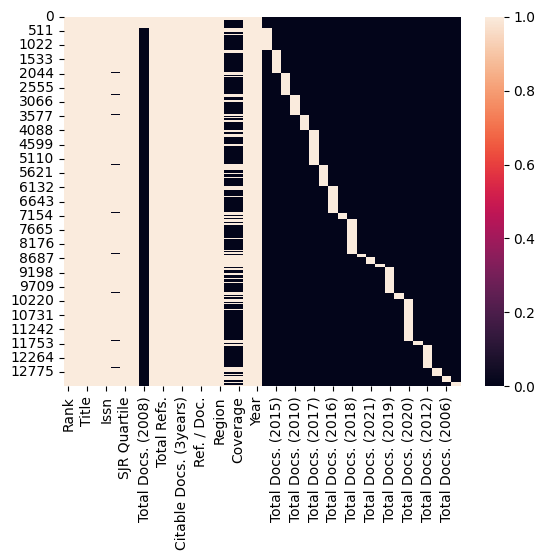

In [5]:
# Visualización de las columnas que representan vacios para desarrollar estrategias que permitan corregirlos
sns.heatmap(df.notnull())

<AxesSubplot: >

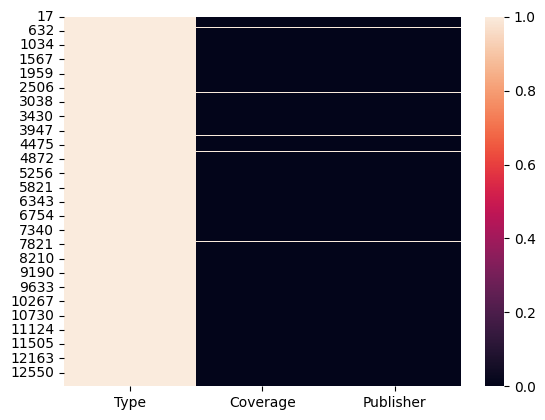

In [6]:
# =============================================================================
# Plot rectangular df as a color-encoded matrix. 
# =============================================================================
# En la columna Type se buscan los registros que sean Conference & Proceedings y se identifica que con relacion a las columnas Coverage y Publisher se encuentran la mayoria de registros vacios
sns.heatmap(df[(df['Type'] == "conference and proceedings")][["Type","Coverage","Publisher"]].notnull())

In [7]:
# Preprocessing data

# Conservar solo los registros de tipo Journal y Book Series
df = df.loc[(df['Type'] == 'journal') | (df['Type'] == 'book series')]

In [8]:
# se almacenan los datos de las columnas Total Docs.20## en la columna Total Docs. per year

df['Total Docs. per Year'] = df[list(df.filter(regex  = '20'))].fillna('').astype(str).apply(lambda x: "".join(x), axis =1)
df['Total Docs. per Year'] = df['Total Docs. per Year'].astype(float)

In [9]:
# Se eliminan las columnas Total Docs.20##
df.drop(list(df.filter(regex  = '20')), inplace = True, axis=1)

In [10]:
# =============================================================================
# Explore the data type columns and identify an assignment error
# =============================================================================
df.dtypes

Rank                        int64
Sourceid                    int64
Title                      object
Type                       object
Issn                       object
SJR                        object
SJR Quartile               object
H index                     int64
Total Docs. (3years)        int64
Total Refs.                 int64
Total Cites (3years)        int64
Citable Docs. (3years)      int64
Cites / Doc. (2years)      object
Ref. / Doc.                object
Country                    object
Region                     object
Publisher                  object
Coverage                   object
Categories                 object
Year                        int64
Total Docs. per Year      float64
dtype: object

In [11]:
# Explore the values with the wrong mapping in detail and create a modification scheme
for i in (5, 12, 13):
    print(f"\033[1m {df.columns[i]}:\n\033[0m {list((df[df.columns[i]]))[:30]}\n")

 SJR:
 ['3,499', '3,301', '2,979', '2,669', '2,581', '2,390', '2,121', '2,052', '1,880', '1,850', '1,829', '1,724', '1,698', '1,544', '1,539', '1,531', '1,449', '1,323', '1,295', '1,196', '1,160', '1,141', '1,123', '1,121', '1,026', '0,973', '0,919', '0,914', '0,913', '0,899']

 Cites / Doc. (2years):
 ['4,38', '3,30', '8,76', '3,44', '4,63', '5,89', '3,67', '2,95', '1,32', '4,65', '4,31', '3,69', '4,73', '3,86', '2,19', '1,58', '2,82', '3,75', '3,96', '3,43', '2,02', '3,11', '3,34', '2,46', '2,43', '2,85', '2,14', '1,58', '2,28', '2,81']

 Ref. / Doc.:
 ['75,57', '34,86', '34,25', '55,89', '33,21', '39,24', '31,62', '51,05', '43,42', '35,26', '46,58', '29,08', '42,78', '33,27', '27,30', '22,41', '104,67', '34,15', '37,97', '31,53', '29,56', '32,43', '27,24', '31,04', '30,92', '37,49', '49,15', '28,43', '30,78', '24,63']



In [12]:
#Modification scheme

# Se establece las columnas que estaban como objeto con el tipo de dato float
df['SJR'] = (df['SJR'].replace(',','.', regex=True).astype(float)).fillna(0)
df['Cites / Doc. (2years)'] = (df['Cites / Doc. (2years)'].replace(',','.', regex=True).astype(float))
df['Ref. / Doc.'] = (df['Ref. / Doc.'].replace(',','.', regex=True).astype(float))

<AxesSubplot: >

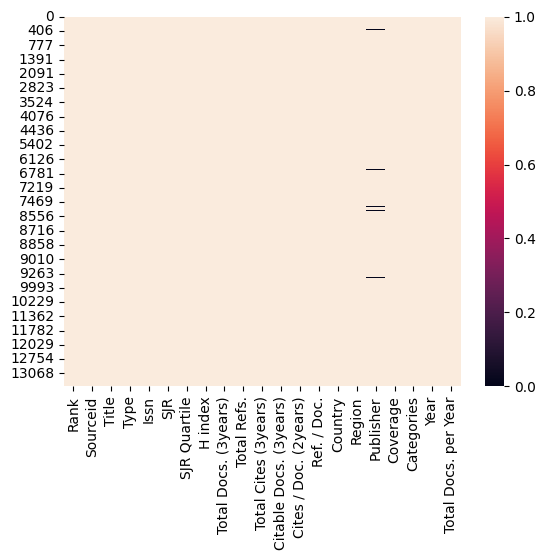

In [13]:
# =============================================================================
# Plot rectangular df as a color-encoded matrix. 
# =============================================================================

# Se realiza el mapa de calor para verificar el resultado del tratamiento que se le dió a las columnas que tenían vacios
sns.heatmap(df.notnull())

In [14]:
# =============================================================================
# Numeric columns
# =============================================================================


int_df = df.select_dtypes(include=['int64', 'float']).copy()
print(f"[{len(int_df)} rows x {len(int_df.columns)} columns]")

[3575 rows x 12 columns]


In [15]:
# =============================================================================
# summarize the mean, standard deviation, min and max values in the dataframe
# =============================================================================
int_df = int_df.reset_index(drop=True)
int_df[['SJR', 'H index', 'Total Docs. per Year']].describe().loc[['mean', 'std', 'min', 'max']].applymap(lambda x: f"{x:0.3f}")

,SJR,H index,Total Docs. per Year
mean,0.656,61.194,88.313
std,0.842,56.917,156.788
min,0.000,0.000,0.000
max,13.206,377.000,1776.000


In [22]:
# =============================================================================
# Categorical columns
# =============================================================================
obj_df = df.select_dtypes(include=['object']).copy()
print(f"[{len(obj_df)} rows x {len(obj_df.columns)} columns]\n")
#Categorical description
obj_df[['Title', 'Country', 'Region', 'Publisher', 'Categories']].describe().loc[['count', 'unique']]

[3575 rows x 9 columns]



,Title,Country,Region,Publisher,Categories
count,3575,3575,3575,3528,3575
unique,273,34,8,134,1033


In [23]:
# =============================================================================
# Categorical columns sets overview
# =============================================================================
i=0
while i<len(obj_df.columns):    
    print(("\033[1m {}: \n \033[0m {}\n").format(obj_df.columns[i],list(set(obj_df[obj_df.columns[i]]))[:10]))
    i+=1

 Title: 
  ['Journal of Machine Learning Research', 'Journal of Cognitive Science', 'Computer Science Journal of Moldova', 'Data Analysis and Knowledge Discovery', 'Mathematical Foundations of Computing', 'Annals of Data Science', 'IEEE Computational Intelligence Magazine', "Revue d'Intelligence Artificielle", "Automatic Control and Computer Sciences (English translation of Avtomatika i Vychislitel'naya Tekhnika)", 'Complexity International']

 Type: 
  ['journal', 'book series']

 Issn: 
  ['10798587, 2326005X', '27133206, 27133192', '17248035, 22110097', '01678655', '09226567, 15730573', '07384602', '1943068X, 19430698', '02783649, 17413176', '15730409, 09210296', '21953570, 21953562']

 SJR Quartile: 
  ['Q1', 'Q2', '-', 'Q4', 'Q3']

 Country: 
  ['Turkey', 'Belgium', 'Bahrain', 'United Kingdom', 'Argentina', 'China', 'Greece', 'Japan', 'Indonesia', 'India']

 Region: 
  ['Latin America', 'Eastern Europe', 'Northern America', 'Pacific Region', 'Africa/Middle East', 'Asiatic Region',

In [18]:
#download dataframe consolidado 
df.to_csv('journalAI.csv',sep = ";", index=False)

In [19]:
#generates widget profile reports from a pandas
profile = ProfileReport(df, title="Top Gun Lab Profiling Report")
profile.to_widgets()

NameError: name 'ProfileReport' is not defined

In [ ]:
#generate a HTML report file
profile.to_file("TopGunLab_Report.html")